In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [34]:
df = pd.read_csv("../data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0.5, 1.0, 'Insurance')

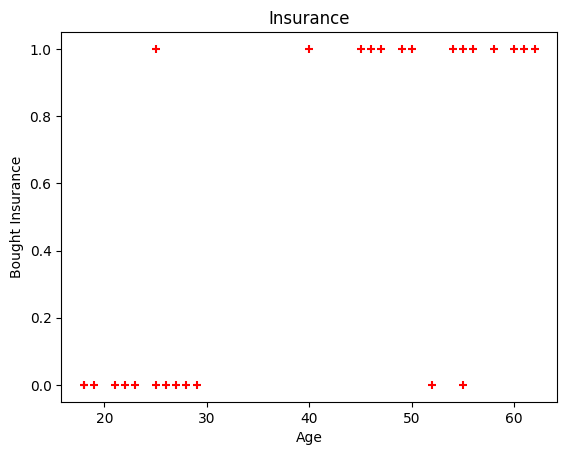

In [35]:
plt.scatter(df.age, df.bought_insurance, marker='+', color="red")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.title("Insurance")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [37]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [38]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [39]:
df.shape

(27, 2)

In [40]:
df['age']

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
model.predict(X_test)

array([1, 0, 0], dtype=int64)

In [45]:
y_test

23    1
19    0
13    0
Name: bought_insurance, dtype: int64

In [46]:
model.score(X_test, y_test)

1.0

In [47]:
model.predict_proba(X_test)

array([[0.31601924, 0.68398076],
       [0.93212641, 0.06787359],
       [0.77520116, 0.22479884]])

In [48]:
model.predict([[56]])

c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

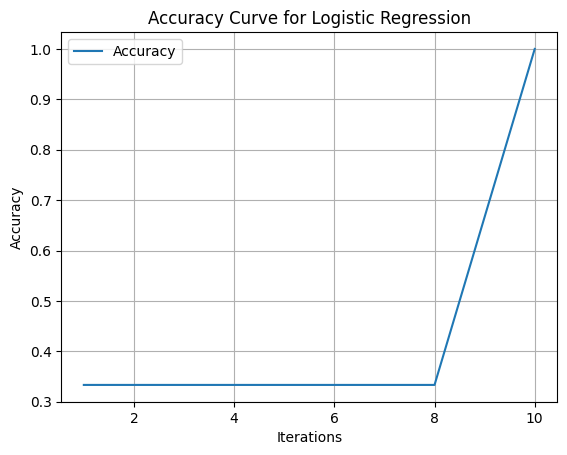

In [54]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm._tqdm import tqdm
accuracies = []
iterations = np.arange(1, 11)

for i in tqdm(iterations):
    temp_model = LogisticRegression(max_iter=i)
    temp_model.fit(X_train, y_train)
    y_pred_temp = temp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy)

# Plot the accuracy curve
plt.plot(iterations, accuracies, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
temp_model.score(X_test, y_test)

1.0